In [6]:
import pandas as pd
import numpy as np

In [36]:
guns_df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [37]:
guns_df.drop(columns =['incident_url_fields_missing','incident_id','incident_url','source_url','sources','gun_stolen','gun_type','n_guns_involved','participant_status','incident_characteristics'], inplace = True)

In [17]:
# Creating Date fields 

guns_df['date'] = pd.to_datetime(guns_df['date'])
guns_df['year'] = guns_df['date'].dt.year
guns_df['month'] = guns_df['date'].dt.month
guns_df['monthday'] = guns_df['date'].dt.day
guns_df['weekday'] = guns_df['date'].dt.weekday

In [38]:
guns_df.head()

,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,location_description,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [19]:
!pip install bs4
!pip install shapely

     |████████████████████████████████| 112kB 30.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 1.5MB 10.3MB/s eta 0:00:01


In [20]:
import matplotlib.pyplot as plt
import requests

from bs4 import BeautifulSoup

url = 'https://lawcenter.giffords.org/scorecard/#rankings'

#Make a get request to retrieve the page
html_page = requests.get(url) 

#Pass the page contents to beautiful soup for parsing
soup = BeautifulSoup(html_page.content, 'html.parser') 

# States use the 'strong' tag
tables = soup.find_all('table')

In [21]:
# Create Dictionary for parsing values
state_rankings_2018 = {'Year': [], 'State':[], 'Grade': [], 'State_GPA': [], 'Gun_Death_Rate': []}

# Define grading scale
grades = {'A':4, 'A-': 3.7, 
          'B+': 3.3, 'B': 3, 'B-':2.7, 
          'C+': 2.3, 'C': 2, 'C-': 1.7, 
          'D+': 1.3, 'D': 1, 'D-': .7, 'F': 0}

# Iterate through each row of table and save to dictionary
for i in range(50):
    state_rankings_2018['Year'].append(2017)
    state_rankings_2018['State'].append(tables[0].find_all('td')[5 * i + 1].text)
    state_rankings_2018['Grade'].append(tables[0].find_all('td')[5 * i + 2].text)
    state_rankings_2018['State_GPA'].append(grades[state_rankings_2018['Grade'][-1]])
    state_rankings_2018['Gun_Death_Rate'].append(float(tables[0].find_all('td')[5 * i + 4].text))

# Create dataframe from dictionary
pd.DataFrame.from_dict(state_rankings_2018).to_csv('giffords/giffords_2018.csv')

#  Preview dataframe
giffords_df_2018 = pd.read_csv('giffords/giffords_2018.csv', index_col=0)
giffords_df_2018.head()

,Year,State,Grade,State_GPA,Gun_Death_Rate
0,2017,Alabama,F,0.0,22.9
1,2017,Alaska,F,0.0,24.5
2,2017,Arizona,F,0.0,15.7
3,2017,Arkansas,F,0.0,20.2
4,2017,California,A,4.0,7.8


In [22]:
# Set categories for downloading data
# Same process will be required for homicide & suicide data
cats = ['homicide', 'suicide']

def get_cdc_data(cat):
    
    # Define columns to import
    cols = ['State', 'Year', 'Deaths', 'Population', 'Age Adjusted Rate']
    
    # Set variables for csv paths to download
    a = f'cdc_data/{cat}/all_1979-1998.txt'
    b = f'cdc_data/{cat}/all_1999-2016.txt'
    gun_a = f'cdc_data/{cat}/firearm_1979-1998.txt'
    gun_b = f'cdc_data/{cat}/firearm_1999-2016.txt'
    
    # Save data to separate dataframes
    df_a = pd.read_csv(a, sep='\t', usecols=cols).dropna()
    df_b = pd.read_csv(b, sep='\t', usecols=cols).dropna()
    gun_df_a = pd.read_csv(gun_a, sep='\t', usecols=cols).dropna()
    gun_df_b = pd.read_csv(gun_b, sep='\t', usecols=cols).dropna()
    
    # Combine dataframes to capture full date range
    df = df_a.append(df_b).reset_index(drop=True)
    gun_df = gun_df_a.append(gun_df_b).reset_index(drop=True)
    
    
    
    # Rename target column to reflect target
    cat_col = f'{cat.title()} Rate'
    df = df.rename(columns={'Age Adjusted Rate': cat_col})
    
    # Replace "suppressed" data with 10
    df[cat_col] = df[cat_col].astype('str')
    df['Year'] = df['Year'].astype('int')
    df = df[df.Year>=1991].reset_index(drop=True)
    df['Deaths'] = df['Deaths'].replace('Suppressed', '10').astype('int')
    
    # Create uniform index based on state & year
    df['State-Year'] = df['State'] + ' ' + df['Year'].astype('str')
    df = df.set_index('State-Year')
    
    # Repeat last 3 steps for gun-related target
    
    # Rename target column to reflect target
    gun_cat_col = f'Gun {cat.title()} Rate'
    gun_df = gun_df.rename(columns={'Age Adjusted Rate': gun_cat_col})
    
    # Replace "suppressed" data with 10
    gun_df[gun_cat_col] = gun_df[gun_cat_col].astype('str')
    gun_df['Year'] = gun_df['Year'].astype('int')
    gun_df = gun_df[gun_df.Year>=1991].reset_index(drop=True)
    gun_df['Deaths'] = gun_df['Deaths'].replace('Suppressed', '10').astype('int')
    
    # Create uniform index based on state & year
    gun_df['State-Year'] = gun_df['State'] + ' ' + gun_df['Year'].astype('str')
    gun_df = gun_df.set_index('State-Year')
    
    # Remove "unreliable" flag in each dataframe
    for ix in df.index:
        if ('Unreliable' in df.loc[ix, cat_col]) or (df.loc[ix, cat_col] == 'Suppressed'):
            deaths = df.loc[ix, 'Deaths']
            pop = df.loc[ix, 'Population']
            df.loc[ix, cat_col] = np.round(100000 * deaths/pop, 1)
            
    for ix in gun_df.index:
        if ('Unreliable' in gun_df.loc[ix, gun_cat_col]) or (gun_df.loc[ix, gun_cat_col] == 'Suppressed'):
            deaths = gun_df.loc[ix, 'Deaths']
            pop = gun_df.loc[ix, 'Population']
            gun_df.loc[ix, gun_cat_col] = np.round(100000 * deaths/pop, 1)
    
    # Combine dataframes
    final_df = df.join(gun_df[gun_cat_col]).drop(['Deaths', 'Population'], axis=1)
    for col in [cat_col, gun_cat_col]:
        final_df[col] = final_df[col].astype('float')
    
    # Create column to calculate ratio between target and gun-related target rates
    final_df[f'Other {cat.title()}'] = final_df[cat_col] - final_df[gun_cat_col]
    final_df[f'{cat.title()} Pct Difference'] = final_df[f'Other {cat.title()}'] / final_df[gun_cat_col]
    return final_df    

In [23]:
# Create single dataframe combining homicide & suicide data
homicide_df = get_cdc_data('homicide')
suicide_df = get_cdc_data('suicide')
gun_mortality = homicide_df.join(suicide_df[suicide_df.columns[2:]])
gun_mortality.head()

,State,Year,Homicide Rate,Gun Homicide Rate,Other Homicide,Homicide Pct Difference,Suicide Rate,Gun Suicide Rate,Other Suicide,Suicide Pct Difference
State-Year,,,,,,,,,,
Alabama 1991,Alabama,1991,13.8,10.0,3.8,0.380000,13.2,10.4,2.8,0.269231
Alabama 1992,Alabama,1992,12.7,9.1,3.6,0.395604,12.6,9.5,3.1,0.326316
Alabama 1993,Alabama,1993,13.4,9.5,3.9,0.410526,13.0,10.1,2.9,0.287129
Alabama 1994,Alabama,1994,13.7,9.9,3.8,0.383838,12.6,9.4,3.2,0.340426
Alabama 1995,Alabama,1995,12.0,9.1,2.9,0.318681,13.0,9.9,3.1,0.313131


In [24]:
cols = ['State', 'Year', 'Deaths', 'Population', 'Age Adjusted Rate']

accident_a = pd.read_csv('cdc_data/accidents/firearm_1979-1998.txt', sep='\t', usecols=cols).dropna()
accident_b = pd.read_csv('cdc_data/accidents/firearm_1999-2016.txt', sep='\t', usecols=cols).dropna()
accident_df = accident_a.append(accident_b)

accident_df = accident_df.rename(columns={'Age Adjusted Rate': 'Gun Accident Rate'})
accident_df['Year'] = accident_df['Year'].astype('int')
accident_df = accident_df[accident_df.Year>=1991].reset_index(drop=True)

accident_df['Deaths'] = accident_df['Deaths'].replace('Suppressed', '10').astype('int')
accident_df['State-Year'] = accident_df['State'] + ' ' + accident_df['Year'].astype('str')
accident_df = accident_df.set_index('State-Year')

for ix in accident_df.index:
    if ('Unreliable' in accident_df.loc[ix, 'Gun Accident Rate']) or (accident_df.loc[ix, 'Gun Accident Rate'] == 'Suppressed'):
        deaths = accident_df.loc[ix, 'Deaths']
        pop = accident_df.loc[ix, 'Population']
        accident_df.loc[ix, 'Gun Accident Rate'] = np.round(100000 * deaths/pop, 1)

accident_df['Gun Accident Rate'] = accident_df['Gun Accident Rate'].astype('float')

gun_mortality = gun_mortality.join(accident_df['Gun Accident Rate'])
gun_mortality.head()

,State,Year,Homicide Rate,Gun Homicide Rate,Other Homicide,Homicide Pct Difference,Suicide Rate,Gun Suicide Rate,Other Suicide,Suicide Pct Difference,Gun Accident Rate
State-Year,,,,,,,,,,,
Alabama 1991,Alabama,1991,13.8,10.0,3.8,0.380000,13.2,10.4,2.8,0.269231,1.5
Alabama 1992,Alabama,1992,12.7,9.1,3.6,0.395604,12.6,9.5,3.1,0.326316,1.7
Alabama 1993,Alabama,1993,13.4,9.5,3.9,0.410526,13.0,10.1,2.9,0.287129,2.0
Alabama 1994,Alabama,1994,13.7,9.9,3.8,0.383838,12.6,9.4,3.2,0.340426,1.8
Alabama 1995,Alabama,1995,12.0,9.1,2.9,0.318681,13.0,9.9,3.1,0.313131,1.9


In [25]:
# Get results for all other years
state_rankings = {'Year':[], 'State':[], 'Grade':[], 'State Grade':[]}

for yr in range(2015, 2018):
    url = f'https://lawcenter.giffords.org/scorecard{int(yr)}/#rankings'

    #Make a get request to retrieve the page
    html_page = requests.get(url) 

    #Pass the page contents to beautiful soup for parsing
    soup = BeautifulSoup(html_page.content, 'html.parser') 

    # States use the 'strong' tag
    tables = soup.find_all('table')

    # Define grading scale
    grades = {'A':4, 'A-': 3.7, 
              'B+': 3.3, 'B': 3, 'B-':2.7, 
              'C+': 2.3, 'C': 2, 'C-': 1.7, 
              'D+': 1.3, 'D': 1, 'D-': .7, 'F': 0}

    # Iterate through each row of table and save to dictionary
    for i in range(50):
        state_rankings['Year'].append(yr-1)
        state_rankings['State'].append(tables[0].find_all('td')[5 * i + 1].text.strip())
        state_rankings['Grade'].append(tables[0].find_all('td')[5 * i + 2].text.strip())
        state_rankings['State Grade'].append(grades[state_rankings['Grade'][-1]])

# Create dataframe from dictionary
pd.DataFrame.from_dict(state_rankings).to_csv('giffords/giffords.csv')


giffords_df = pd.read_csv('giffords/giffords.csv', index_col=0)
giffords_df['State-Year'] = giffords_df.State + ' ' + giffords_df.Year.astype('str')
giffords_df = giffords_df.set_index('State-Year').sort_index()
giffords_df.head(15)

,Year,State,Grade,State Grade
State-Year,,,,
Alabama 2014,2014,Alabama,F,0.0
Alabama 2015,2015,Alabama,F,0.0
Alabama 2016,2016,Alabama,F,0.0
Alaska 2014,2014,Alaska,F,0.0
Alaska 2015,2015,Alaska,F,0.0
Alaska 2016,2016,Alaska,F,0.0
Arizona 2014,2014,Arizona,F,0.0
Arizona 2015,2015,Arizona,F,0.0
Arizona 2016,2016,Arizona,F,0.0


In [26]:
# death_rates['Year'] = death_rates.Year.astype(int)
death_rates = gun_mortality[gun_mortality['Year'] >= 2014]
death_rates['Year'].unique()

array([2014, 2015, 2016])

In [27]:
df = giffords_df.join(death_rates[death_rates.columns[2:]])
# df = df.reset_index(drop=True)
df.head()

,Year,State,Grade,State Grade,Homicide Rate,Gun Homicide Rate,Other Homicide,Homicide Pct Difference,Suicide Rate,Gun Suicide Rate,Other Suicide,Suicide Pct Difference,Gun Accident Rate
State-Year,,,,,,,,,,,,,
Alabama 2014,2014,Alabama,F,0.0,8.1,6.4,1.7,0.265625,14.5,9.6,4.9,0.510417,0.6
Alabama 2015,2015,Alabama,F,0.0,10.2,8.5,1.7,0.200000,14.9,10.4,4.5,0.432692,0.4
Alabama 2016,2016,Alabama,F,0.0,11.8,9.8,2.0,0.204082,15.6,10.7,4.9,0.457944,0.4
Alaska 2014,2014,Alaska,F,0.0,4.7,2.6,2.1,0.807692,22.1,15.4,6.7,0.435065,1.4
Alaska 2015,2015,Alaska,F,0.0,8.0,5.4,2.6,0.481481,26.9,16.5,10.4,0.630303,1.4


In [28]:
# Create dataframe of neighboring state average GPAs
import urllib.request
url = 'https://github.com/ritvikmath/StarbucksStoreScraping/raw/master/us_states.geojson'

urllib.request.urlretrieve(url, 'national_data/us_states.geojson')

#manipulate complex shapes
from shapely.geometry import Polygon, MultiPolygon

#manipulate json objects
import json

#open up the US States Geojson
with open('us_states.geojson') as f:
    states = json.load(f)

#initialize a dictionary to store the state shape info
statePolygons = {}

#for each state ...
for stateInfo in states['features']:
    #get the state name
    stateName = stateInfo['properties']['NAME']
    
    #the state geography is either a Polygon (some shape) or a MultiPolygon (a collection of polygons)
    stateGeographyType = stateInfo['geometry']['type']
    
    #if it's a Polygon, convert the coordinates to a shapely Polygon object
    if stateGeographyType == 'Polygon':
        stateGeometry = Polygon(stateInfo['geometry']['coordinates'][0])
        
    #if its a MultiPolygon, convert each contained polygon into a shapely Polygon object ...
    #and then store the list of Polygons in a shapely MultiPolygon object
    elif stateGeographyType == 'MultiPolygon':
        polygonsInMultipolygon = [Polygon(p[0]) for p in stateInfo['geometry']['coordinates']]
        stateGeometry = MultiPolygon(polygonsInMultipolygon)
    
    #store the state geography info in the dictionary
    statePolygons[stateName] = stateGeometry

In [29]:
neighbors = {}

#for each state ...
for k1,v1 in statePolygons.items():
    neighbors[k1] = []
    #iterate over each other state
    for k2,v2 in statePolygons.items():
        #if the states touch, then add this state to the list of neighboring states
        if v1.touches(v2):
            neighbors[k1].append(k2)
            
for state in sorted(neighbors.keys())[:5]:
    print(f'{state}: {neighbors[state]}')

Alabama: ['Tennessee', 'Florida', 'Georgia', 'Mississippi']
Alaska: []
Arizona: ['Nevada', 'Utah', 'California', 'Colorado', 'New Mexico']
Arkansas: ['Tennessee', 'Texas', 'Louisiana', 'Mississippi', 'Missouri', 'Oklahoma']
California: ['Nevada', 'Arizona', 'Oregon']


In [30]:
# Create nested dictionaries to map grades to year and neighbor states
neighbor_grades = {}

for year in df.Year.unique():
    neighbor_grades[year] = {}
    
    for state in df.State.unique():
        # Default score is state score if no neighboring state (i.e. Alaska)
        default_score = df[(df.State==state) & (df.Year==year)]['State Grade'].values[0]
        scores = []
        
        for neighbor in neighbors[state]:
            
            if neighbor != 'District of Columbia':
                # Look up score based on year and state, add to scores list
                scores.append(df[(df.State==neighbor) & (df.Year==year)]['State Grade'].values[0])
        
        # Add appropriate score to dictionary; mean of scores or default score
        neighbor_grades[year][state] = np.mean(scores) if len(scores)>0 else default_score
        
neighbor_grades[2016]

{'Alabama': 0.175,
 'Alaska': 0.0,
 'Arizona': 1.4,
 'Arkansas': 0.11666666666666665,
 'California': 1.0,
 'Colorado': 0.14285714285714285,
 'Connecticut': 3.5666666666666664,
 'Delaware': 3.1333333333333333,
 'Florida': 0.0,
 'Georgia': 0.27999999999999997,
 'Hawaii': 3.7,
 'Idaho': 1.0,
 'Illinois': 0.82,
 'Indiana': 1.575,
 'Iowa': 1.3833333333333335,
 'Kansas': 0.75,
 'Kentucky': 0.9571428571428572,
 'Louisiana': 0.0,
 'Maine': 0.0,
 'Maryland': 1.5,
 'Massachusetts': 2.1399999999999997,
 'Michigan': 1.1333333333333335,
 'Minnesota': 0.85,
 'Mississippi': 0.175,
 'Missouri': 0.8375,
 'Montana': 0.0,
 'Nebraska': 0.6166666666666667,
 'Nevada': 1.2,
 'New Hampshire': 1.2333333333333334,
 'New Jersey': 2.9,
 'New Mexico': 0.4,
 'New York': 2.62,
 'North Carolina': 0.425,
 'North Dakota': 0.7666666666666666,
 'Ohio': 0.9400000000000001,
 'Oklahoma': 0.3333333333333333,
 'Oregon': 2.0,
 'Pennsylvania': 2.516666666666667,
 'Rhode Island': 3.7,
 'South Carolina': 0.35,
 'South Dakota': 0.

In [31]:
# Create ordered list of scores based on df.index
GPAs = []
for ix in df.index:
    state = df.loc[ix, 'State']
    year = df.loc[ix, 'Year']
    GPAs.append(neighbor_grades[year][state])

# Create new column from list
df['Neighbor State GPA'] = GPAs
df.head()

,Year,State,Grade,State Grade,Homicide Rate,Gun Homicide Rate,Other Homicide,Homicide Pct Difference,Suicide Rate,Gun Suicide Rate,Other Suicide,Suicide Pct Difference,Gun Accident Rate,Neighbor State GPA
State-Year,,,,,,,,,,,,,,
Alabama 2014,2014,Alabama,F,0.0,8.1,6.4,1.7,0.265625,14.5,9.6,4.9,0.510417,0.6,0.000
Alabama 2015,2015,Alabama,F,0.0,10.2,8.5,1.7,0.200000,14.9,10.4,4.5,0.432692,0.4,0.000
Alabama 2016,2016,Alabama,F,0.0,11.8,9.8,2.0,0.204082,15.6,10.7,4.9,0.457944,0.4,0.175
Alaska 2014,2014,Alaska,F,0.0,4.7,2.6,2.1,0.807692,22.1,15.4,6.7,0.435065,1.4,0.000
Alaska 2015,2015,Alaska,F,0.0,8.0,5.4,2.6,0.481481,26.9,16.5,10.4,0.630303,1.4,0.000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Alabama 2014 to Wyoming 2016
Data columns (total 14 columns):
Year                       150 non-null int64
State                      150 non-null object
Grade                      150 non-null object
State Grade                150 non-null float64
Homicide Rate              150 non-null float64
Gun Homicide Rate          150 non-null float64
Other Homicide             150 non-null float64
Homicide Pct Difference    150 non-null float64
Suicide Rate               150 non-null float64
Gun Suicide Rate           150 non-null float64
Other Suicide              150 non-null float64
Suicide Pct Difference     150 non-null float64
Gun Accident Rate          150 non-null float64
Neighbor State GPA         150 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 22.6+ KB


In [33]:
guns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 23 columns):
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     223180 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      227733 non-null float64
latitude                    231754 non-null float64
location_description        42089 non-null object
longitude                   231754 non-null float64
notes                       158660 non-null object
participant_age             147379 non-null object
participant_age_group       197558 non-null object
participant_gender          203315 non-null object
participant_name            117424 non-null object
participant_relationship    15774 non-null object
participant_type            214814 non-null object
state_house_dis

In [34]:
df.corr()

,Year,State Grade,Homicide Rate,Gun Homicide Rate,Other Homicide,Homicide Pct Difference,Suicide Rate,Gun Suicide Rate,Other Suicide,Suicide Pct Difference,Gun Accident Rate,Neighbor State GPA
Year,1.000000,0.017285,0.154081,0.183426,-0.022378,-0.162904,0.068616,0.054942,0.062986,-0.032991,-0.007902,0.021823
State Grade,0.017285,1.000000,-0.259365,-0.241374,-0.233122,0.106158,-0.664303,-0.803015,-0.097910,0.739167,-0.314158,0.686580
Homicide Rate,0.154081,-0.259365,1.000000,0.983489,0.686423,-0.474261,-0.024786,0.200610,-0.439020,-0.386405,-0.204304,-0.401777
Gun Homicide Rate,0.183426,-0.241374,0.983489,1.000000,0.543489,-0.582400,-0.084438,0.154799,-0.497467,-0.380386,-0.247669,-0.390121
Other Homicide,-0.022378,-0.233122,0.686423,0.543489,1.000000,0.140469,0.224338,0.308480,-0.037363,-0.263786,0.047576,-0.295969
Homicide Pct Difference,-0.162904,0.106158,-0.474261,-0.582400,0.140469,1.000000,0.172331,-0.023658,0.463415,0.343105,0.395137,0.253927
Suicide Rate,0.068616,-0.664303,-0.024786,-0.084438,0.224338,0.172331,1.000000,0.922996,0.687060,-0.517536,0.489990,-0.459494
Gun Suicide Rate,0.054942,-0.803015,0.200610,0.154799,0.308480,-0.023658,0.922996,1.000000,0.354552,-0.736408,0.438275,-0.627869
Other Suicide,0.062986,-0.097910,-0.439020,-0.497467,-0.037363,0.463415,0.687060,0.354552,1.000000,0.132947,0.363059,0.069037
Suicide Pct Difference,-0.032991,0.739167,-0.386405,-0.380386,-0.263786,0.343105,-0.517536,-0.736408,0.132947,1.000000,-0.119626,0.694243


In [35]:
guns_df.corr()

,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,monthday,weekday
n_killed,1.000000,-0.125425,0.055545,-0.080078,-0.062149,-0.006015,-0.010650,0.003035,0.002522,-0.000542,0.023383
n_injured,-0.125425,1.000000,-0.007636,-0.011379,0.036962,-0.030355,-0.044294,0.005972,0.017748,0.002767,0.056763
congressional_district,0.055545,-0.007636,1.000000,-0.259488,-0.215606,0.228827,0.309116,-0.001944,-0.013135,0.000829,0.000445
latitude,-0.080078,-0.011379,-0.259488,1.000000,-0.056713,-0.237958,0.028611,0.015168,0.015401,0.005111,0.020414
longitude,-0.062149,0.036962,-0.215606,-0.056713,1.000000,0.236450,0.113408,-0.016025,0.006517,0.004493,-0.000292
state_house_district,-0.006015,-0.030355,0.228827,-0.237958,0.236450,1.000000,0.431299,-0.005719,0.006871,-0.004278,-0.008496
state_senate_district,-0.010650,-0.044294,0.309116,0.028611,0.113408,0.431299,1.000000,-0.008966,0.002435,-0.001615,-0.006027
year,0.003035,0.005972,-0.001944,0.015168,-0.016025,-0.005719,-0.008966,1.000000,-0.166297,-0.001158,-0.003868
month,0.002522,0.017748,-0.013135,0.015401,0.006517,0.006871,0.002435,-0.166297,1.000000,0.004923,0.008306
monthday,-0.000542,0.002767,0.000829,0.005111,0.004493,-0.004278,-0.001615,-0.001158,0.004923,1.000000,0.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27184c9f60>,
      dtype=object)

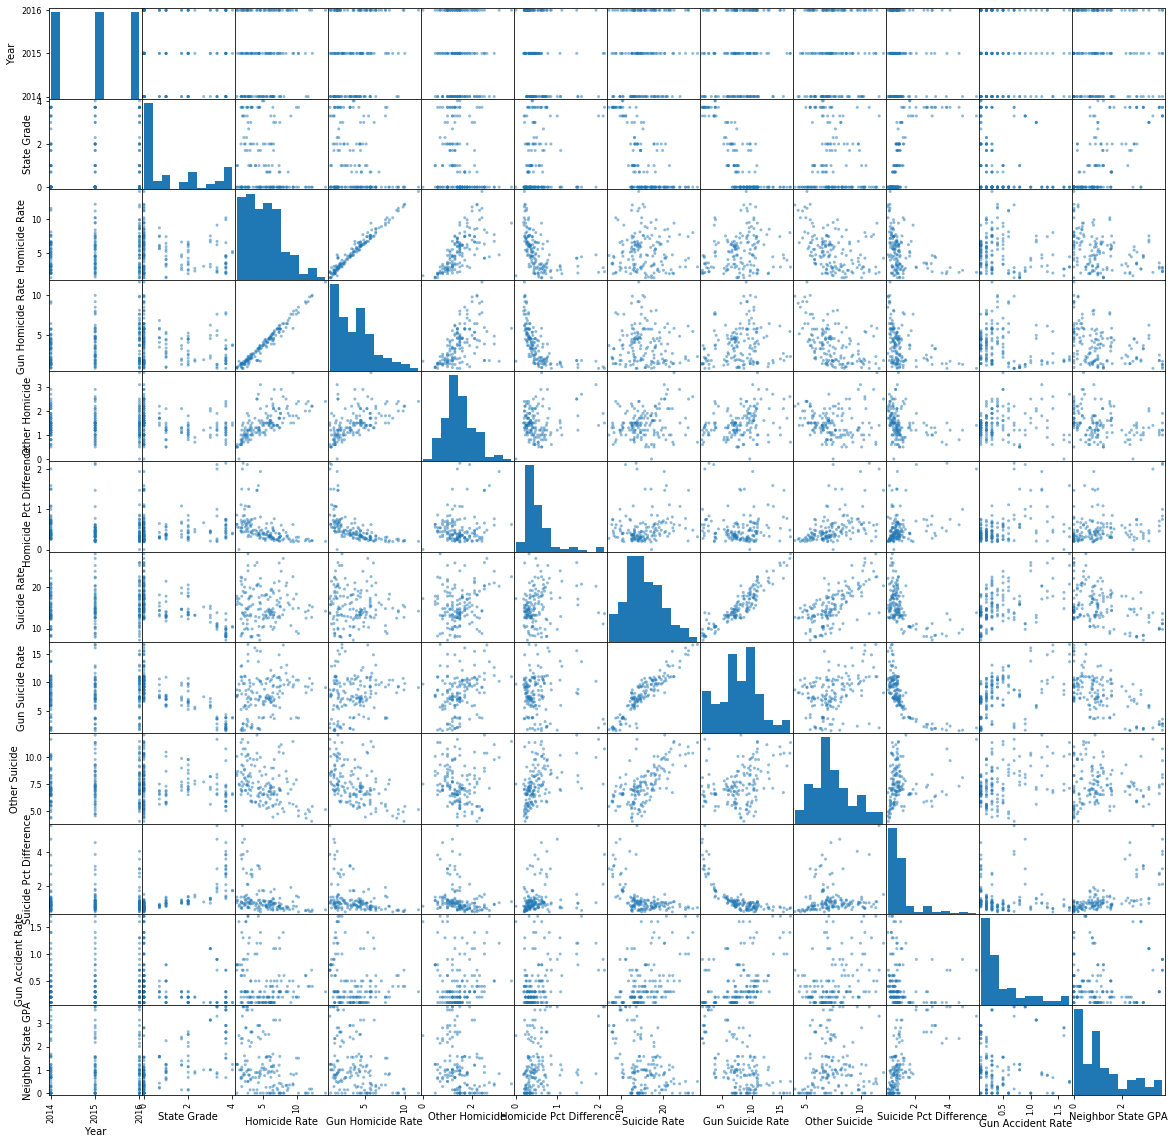

In [46]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
targets = ['Homicide_Rate', 'Suicide_Rate']
predictors = ['State_Grade', 'Neighbor_State_GPA']
X=df['Homicide_Rate']
y=df['State_Grade']

KeyError: 'Homicide_Rate'

In [53]:
# Split into Train/Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

AttributeError: 'list' object has no attribute 'shape'

In [54]:
#Support Vector Machine
from sklearn import svm
clf_svm=svm.SVR(kernel='rbf')
clf_svm=clf_svm.fit(X_train, y_train)
yhat_SVM = clf_svm.predict(X_test)

ValueError: could not convert string to float: 'Homicide_Rate'

KeyError: "None of [Index(['State_Grade', 'Neighbor_State_GPA'], dtype='object')] are in the [columns]"